### Loading the data and best pipelines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dalex as dx

from final_project.modelling.save_load import load_pipeline, load_X_y
from final_project.evaluation.evaluation import evaluate_predictions, plot_predicted_actual, dalex_explainer, feature_importance, plot_pdp, plot_lorenz

glm_best_pipeline = load_pipeline("glm_best_pipeline")
lgbm_best_pipeline = load_pipeline("lgbm_best_pipeline")


X_test, y_test = load_X_y("test")
X_train, y_train = load_X_y("train")

/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/dalex/_global_checks.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


### Generating predictions 

In [2]:
glm_pred = glm_best_pipeline.predict(X_test)
lgbm_pred = lgbm_best_pipeline.predict(X_test) 

/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



### Evaluating predictions 

In [3]:
glm_metrics = evaluate_predictions(y_test, glm_pred)
glm_metrics

,0
Log: True Mean,1.374884e+01
Log: Mean Prediction,1.374478e+01
Log: MAE,1.916201e-01
Log: RMSE,2.589399e-01
Log: Bias,-2.955864e-04
Log: MAE / Mean,1.393718e-02
Price: True Mean,1.081438e+06
Price: Mean Prediction,1.035288e+06
Price: MAE,2.185577e+05
Price: RMSE,4.163466e+05


In [4]:
lgbm_metrics = evaluate_predictions(y_test, lgbm_pred)
lgbm_metrics

,0
Log: True Mean,1.374884e+01
Log: Mean Prediction,1.374633e+01
Log: MAE,1.378725e-01
Log: RMSE,1.895706e-01
Log: Bias,-1.827121e-04
Log: MAE / Mean,1.002794e-02
Price: True Mean,1.081438e+06
Price: Mean Prediction,1.057941e+06
Price: MAE,1.614812e+05
Price: RMSE,3.138395e+05


In [5]:
comparison = pd.concat({"GLM": glm_metrics, "LGBM": lgbm_metrics}, axis=1,)
comparison

,GLM,LGBM
,0,0
Log: True Mean,1.374884e+01,1.374884e+01
Log: Mean Prediction,1.374478e+01,1.374633e+01
Log: MAE,1.916201e-01,1.378725e-01
Log: RMSE,2.589399e-01,1.895706e-01
Log: Bias,-2.955864e-04,-1.827121e-04
Log: MAE / Mean,1.393718e-02,1.002794e-02
Price: True Mean,1.081438e+06,1.081438e+06
Price: Mean Prediction,1.035288e+06,1.057941e+06
Price: MAE,2.185577e+05,1.614812e+05


In [6]:
comparison_fmt = comparison.copy()
pd.options.display.float_format = "{:,.4f}".format
comparison_fmt


,GLM,LGBM
,0,0
Log: True Mean,13.7488,13.7488
Log: Mean Prediction,13.7448,13.7463
Log: MAE,0.1916,0.1379
Log: RMSE,0.2589,0.1896
Log: Bias,-0.0003,-0.0002
Log: MAE / Mean,0.0139,0.0100
Price: True Mean,"1,081,437.6113","1,081,437.6113"
Price: Mean Prediction,"1,035,287.8495","1,057,940.6832"
Price: MAE,"218,557.7247","161,481.1813"


### Predicted vs Actuals plots 

In [7]:
y_test_price = np.exp(y_test)
glm_pred_price = np.exp(glm_pred)
lgbm_pred_price = np.exp(lgbm_pred)


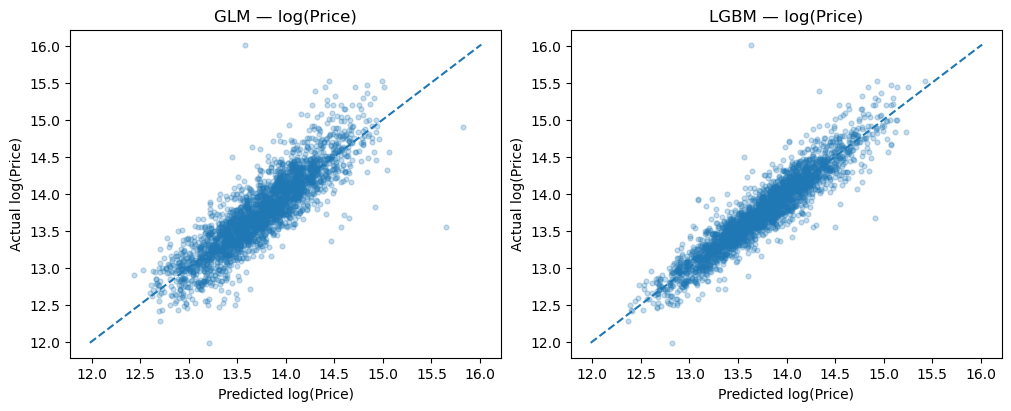

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

plot_predicted_actual(
    axes[0], y_test, glm_pred,
    title="GLM — log(Price)",
    xlabel="Predicted log(Price)", ylabel="Actual log(Price)"
)

plot_predicted_actual(
    axes[1], y_test, lgbm_pred,
    title="LGBM — log(Price)",
    xlabel="Predicted log(Price)", ylabel="Actual log(Price)"
)

plt.show()


### Using Dalex explainers to find most important features

In [24]:
glm_explainer = dalex_explainer(glm_best_pipeline, X_test, y_test, "GLM")
lgbm_explainer = dalex_explainer(lgbm_best_pipeline, X_test, y_test, "LGBM")


Preparation of a new explainer is initiated

  -> data              : 2686 rows 19 cols
  -> target variable   : 2686 values
  -> model_class       : glum._glm.GeneralizedLinearRegressor (default)
  -> label             : GLM
  -> predict function  : <function yhat_default at 0x14daa0d60> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 12.4, mean = 13.7, max = 15.8
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -2.11, mean = 0.00406, max = 2.43
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 2686 rows 19 cols
  -> target variable   : 2686 values
  -> model_class       : lightgbm.sklearn.LGBMRegressor (default)
  -> label             : LGBM
  -> predict function  : <function yhat_default at 0x

/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



  -> predicted values  : min = 12.4, mean = 13.7, max = 15.4
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.24, mean = 0.00251, max = 2.38
  -> model_info        : package sklearn

A new explainer has been created!


/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



In [25]:
glm_importance = feature_importance(glm_explainer)
lgbm_importance = feature_importance(lgbm_explainer)

/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fi

In [26]:
glm_importance.plot(max_vars=10)

In [27]:
lgbm_importance.plot(max_vars=10)

In [28]:
glm_explainer.data.dtypes


Suburb                   object
Type                     object
Method                   object
Distance                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
YearBuilt               float64
Lattitude               float64
Longtitude              float64
Regionname               object
Year_binary               int64
Missing_Car               int64
Missing_BuildingArea      int64
Missing_YearBuilt         int64
Landsize_zero             int64
Bathroom_zero             int64
Bedroom2_zero             int64
dtype: object

* The top 5 features in the LGBM model are: 
    * Type
    * Suburb
    * Distance
    * Landsize
    * Bedroom2
* PDP of Suburb is not very interpretable since there are > 300 suburbs and is a categorical feature.

### Plotting Partial Dependence Plots (PDP) of top features

In [29]:
plot_pdp(glm_explainer, lgbm_explainer, "Type", variable_type = "categorical")

Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]
/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



In [30]:
plot_pdp(glm_explainer, lgbm_explainer, "Suburb", variable_type = "categorical")

Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

Calculating ceteris paribus: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]
/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



In [31]:
plot_pdp(glm_explainer, lgbm_explainer, "Landsize", variable_type = "numerical")

Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

Calculating ceteris paribus: 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]
/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



In [32]:
plot_pdp(glm_explainer, lgbm_explainer, "Distance", variable_type = "numerical")

Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

Calculating ceteris paribus: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]
/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



In [33]:
plot_pdp(glm_explainer, lgbm_explainer, "Bedroom2", variable_type = "numerical")

Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

Calculating ceteris paribus: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]
/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



In [34]:
plot_pdp(glm_explainer, lgbm_explainer, "Lattitude", variable_type = "numerical")

Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

Calculating ceteris paribus: 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]
/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



In [35]:
plot_pdp(glm_explainer, lgbm_explainer, "Longtitude", variable_type = "numerical")

Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names

Calculating ceteris paribus: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]
/Users/15dan/miniconda3/envs/d100_housing/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning:

X does not have valid feature names, but LGBMRegressor was fitted with feature names



### Lorenz curve

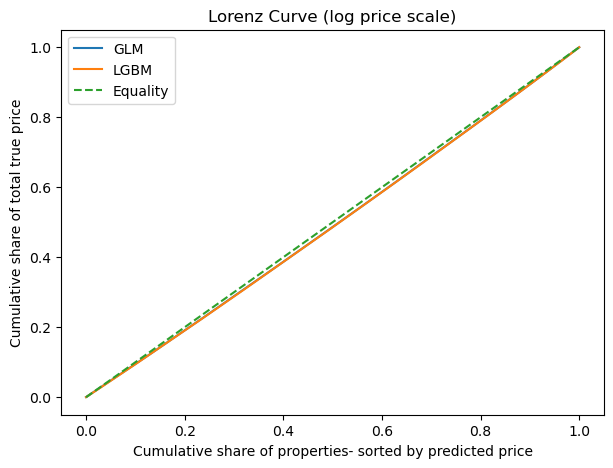

In [36]:
plot_lorenz(y_test, glm_pred, lgbm_pred, xtitle = "Lorenz Curve (log price scale)")

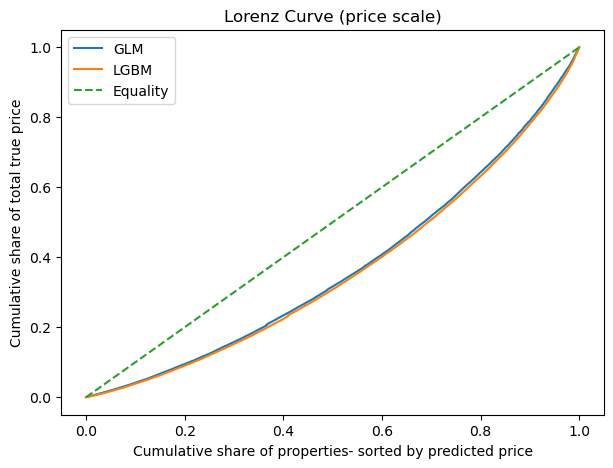

In [37]:
plot_lorenz(y_test_price, glm_pred, lgbm_pred, xtitle = "Lorenz Curve (price scale)")
